# Problem Defination
To predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.
# Data
The data has been downloaded from kaggle on bluebook for bulldozers competition:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
#### The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
#### The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale
# Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

# Features
53 features.
You can check this out here https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
You can also run the following commands in order to see the features in jupyter itself
- df1=pd.read_csv("data/Data_dictionary.csv")
- df1.drop(["Unnamed: 2"],axis=1)

In [2]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
df1=pd.read_csv("data/Data_dictionary.csv",)
pd.set_option('display.max_colwidth',None)
df1.drop(["Unnamed: 2"],axis=1)

,Variable,Description
0,SalesID,unique identifier of a particular sale of a machine at auction
1,MachineID,identifier for a particular machine; machines may have multiple sales
2,ModelID,identifier for a unique machine model (i.e. fiModelDesc)
3,datasource,source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs.
4,auctioneerID,"identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale
7,UsageBand,"value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [3]:
#importing training and validations sets
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)


In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We need to parse data into date time object so that matplotlib can intelligently look on this.
We again import the csv file,This time telling that we have a time series data and pandas should look on this and convert it accordingly to datetime64

In [5]:
df=pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analaysis

<AxesSubplot:ylabel='Frequency'>

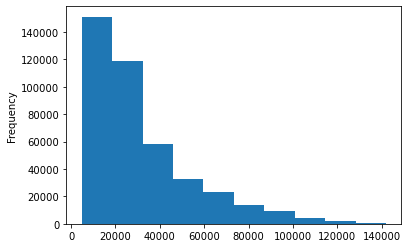

In [7]:
df.SalePrice.plot.hist()

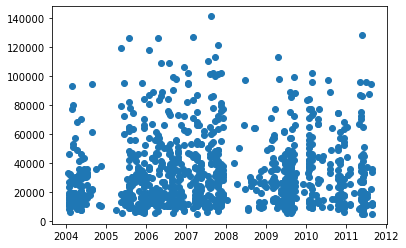

In [8]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [9]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [11]:
#Sorting the dataframe according to the dates
df.sort_values(by=["saledate"],inplace=True)

In [12]:
df_temp=df.copy()

In [13]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature Engineering
Since this is time series data we can use `saledate` to create new attributes

In [14]:
df_temp["Saleyear"]=df_temp.saledate.dt.year
df_temp["Salemonth"]=df_temp.saledate.dt.year
df_temp["Saleday"]=df_temp.saledate.dt.year
df_temp["Saledayofweek"]=df_temp.saledate.dt.dayofweek
df_temp["SaledayofYear"]=df_temp.saledate.dt.dayofyear
#dropping saledate coloumn
#Note-we can always get it back from our original df as we are working of the copy of the data
df_temp.drop(["saledate"],axis=1,inplace=True)


In [15]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Saleyear,Salemonth,Saleday,Saledayofweek,SaledayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1989,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1989,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1989,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1989,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1989,1989,1,31


In [16]:
#checking which state has the maximum sale
df_temp.state.value_counts()[:5]

Florida       67320
Texas         53110
California    29761
Washington    16222
Georgia       14633
Name: state, dtype: int64

# Data Cleaning
We have seen that we have lot of null values and object dataype attributes
We need to deal with that as our model won't work.
### Converting data into categories

In [17]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Converting data into numbers
We know that machine learning works on numbers and finds patterns using it,But the data we have contains lot of strings.
So to deal with this we need to convert it into numbers.We can use pandas catagories.

In [18]:
##We check all the features with strings
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
##So we have lot of string features,we need to convert them
###we convert string datatype into category
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [20]:
df_temp.Ripper.cat.categories,df_temp.Ripper.cat.codes

(Index(['Multi Shank', 'None or Unspecified', 'Single Shank', 'Yes'], dtype='object'),
 205615    1
 274835   -1
 141296    1
 212552   -1
 62755     1
          ..
 410879    0
 412476   -1
 411927   -1
 407124    3
 409203   -1
 Length: 412698, dtype: int8)

## Filling missing data 

In [21]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [22]:
##We fill this features with median since there is lot of data and it could be sensitive to the outliners.

In [23]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label+"IsMissing"]=pd.isnull(content)
            df_temp[label]=content.fillna(content.median())
        

In [24]:
df_temp.isna().sum()

SalesID                                   0
SalePrice                                 0
MachineID                                 0
ModelID                                   0
datasource                                0
auctioneerID                              0
YearMade                                  0
MachineHoursCurrentMeter                  0
UsageBand                            339028
fiModelDesc                               0
fiBaseModel                               0
fiSecondaryDesc                      140727
fiModelSeries                        354031
fiModelDescriptor                    337882
ProductSize                          216605
fiProductClassDesc                        0
state                                     0
ProductGroup                              0
ProductGroupDesc                          0
Drive_System                         305611
Enclosure                               334
Forks                                214983
Pad_Type                        

In [25]:
df_temp.auctioneerIDIsMissing.value_counts()

False    392562
True      20136
Name: auctioneerIDIsMissing, dtype: int64

In [26]:
##Filling categories with numbers
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[label+"Is Missing"]=pd.isnull(content)
        df_temp[label]=pd.Categorical(content).codes+1

In [27]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_MountingIs Missing     0
Blade_TypeIs Missing           0
Travel_ControlsIs Missing      0
Differential_TypeIs Missing    0
Steering_ControlsIs Missing    0
Length: 103, dtype: int64

In [28]:
df_temp.shape

(412698, 103)

In [29]:
df_temp.Saleyear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: Saleyear, Length: 412698, dtype: int64

In [30]:
df_temp.Saleyear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: Saleyear, dtype: int64

In [31]:
df_val=df_temp[df_temp.Saleyear==2012]
df_train=df_temp[df_temp.Saleyear!=2012]

In [32]:
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
x_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

# Modelling
### Building a regression  model


In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,max_samples=10000,random_state=42)
model.fit(x_train,y_train)

CPU times: user 28.1 s, sys: 536 ms, total: 28.6 s
Wall time: 6.05 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [34]:
model.score(x_train,y_train),model.score(x_valid,y_valid)


(0.8629400898307, 0.833803158029507)

In [35]:
x_train.shape

(401125, 102)

### Evaluating the Model

In [36]:
from sklearn.metrics import mean_squared_log_error
def rmsle(model):
    train_pred=model.predict(x_train)
    valid_pred=model.predict(x_valid)
    eval_score={"Training rmsle":np.sqrt(mean_squared_log_error(y_train,train_pred)),
                "Valid rmsle":np.sqrt(mean_squared_log_error(y_valid,valid_pred))}
    return eval_score


In [37]:
rmsle(model)

{'Training rmsle': 0.2556337532202927, 'Valid rmsle': 0.2901060118829143}

## Hyperparameter Tuning
We will use randomised search cv to improve upon this and find better parameters in it

In [38]:
%%time 
from sklearn.model_selection import RandomizedSearchCV
#Creating a dictionary and then feeding it to the model
rs_grid={"n_estimators":np.arange(10,51,10),
         "max_depth":[None],
         "min_samples_split": np.arange(2, 21, 2),
         "min_samples_leaf": np.arange(1, 20, 2),
         "max_features": ["sqrt", "auto"],
         "max_samples": [None]
         }
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rs_grid,
                                                  cv=5,verbose=True,n_iter=5)
                                                  
rs_model.fit(x_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 1min 58s, sys: 9.76 s, total: 2min 8s
Wall time: 5min 42s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None],
                                        'max_features': ['sqrt', 'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([10, 20, 30, 40, 50])},
                   verbose=True)

In [41]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': None}

In [40]:
rmsle(rs_model)

{'Training rmsle': 0.14265694340447826, 'Valid rmsle': 0.2647013022971302}

# Testing and Predictions
### Preprocessing the test data
The test data need to be in the same shape as model needs it to be.

In [91]:
df_test=pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=["saledate"])

In [92]:
df_test.shape,x_train.shape

((12457, 52), (401125, 102))

In [93]:
df_test.shape

(12457, 52)

In [94]:
#we have 101 coloumns in test data and 102 in train.So we need to fix that too.
df_test.isna().sum().T

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [95]:
###So repeating all feature engineering steps
df_test["Saleyear"]=df_test.saledate.dt.year
df_test["Salemonth"]=df_test.saledate.dt.year
df_test["Saleday"]=df_test.saledate.dt.year
df_test["Saledayofweek"]=df_test.saledate.dt.dayofweek
df_test["SaledayofYear"]=df_test.saledate.dt.dayofyear
#dropping saledate coloumn
#Note-we can always get it back from our original df as we are working of the copy of the data
df_test.drop(["saledate"],axis=1,inplace=True)##since no data is missing in auctioneerId in test data so we fill false in all coloumns.
df_test["auctioneerIDIsMissing"]=False
## we need our test data in the same shape

##So we have lot of string features,we need to convert them
###we convert string datatype into category
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label+"IsMissing"]=pd.isnull(content)
            df_test[label]=content.fillna(content.median())
        ##Filling categories with numbers
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+"Is Missing"]=pd.isnull(content)
        df_test[label]=pd.Categorical(content).codes+1

In [96]:
pd.set_option('display.max_columns',None)
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Saleyear,Salemonth,Saleday,Saledayofweek,SaledayofYear,auctioneerIDIsMissing,MachineHoursCurrentMeterIsMissing,UsageBandIs Missing,fiModelDescIs Missing,fiBaseModelIs Missing,fiSecondaryDescIs Missing,fiModelSeriesIs Missing,fiModelDescriptorIs Missing,ProductSizeIs Missing,fiProductClassDescIs Missing,stateIs Missing,ProductGroupIs Missing,ProductGroupDescIs Missing,Drive_SystemIs Missing,EnclosureIs Missing,ForksIs Missing,Pad_TypeIs Missing,Ride_ControlIs Missing,StickIs Missing,TransmissionIs Missing,TurbochargedIs Missing,Blade_ExtensionIs Missing,Blade_WidthIs Missing,Enclosure_TypeIs Missing,Engine_HorsepowerIs Missing,HydraulicsIs Missing,PushblockIs Missing,RipperIs Missing,ScarifierIs Missing,Tip_ControlIs Missing,Tire_SizeIs Missing,CouplerIs Missing,Coupler_SystemIs Missing,Grouser_TracksIs Missing,Hydraulics_FlowIs Missing,Track_TypeIs Missing,Undercarriage_Pad_WidthIs Missing,Stick_LengthIs Missing,ThumbIs Missing,Pattern_ChangerIs Missing,Grouser_TypeIs Missing,Backhoe_MountingIs Missing,Blade_TypeIs Missing,Travel_ControlsIs Missing,Differential_TypeIs Missing,Steering_ControlsIs Missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1989,1989,1,17,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1989,1989,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1989,1989,1,31,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1989,1989,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1989,1989,1,31,False,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [97]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Saleyear,Salemonth,Saleday,Saledayofweek,SaledayofYear,auctioneerIDIsMissing,MachineHoursCurrentMeterIsMissing,UsageBandIs Missing,fiModelDescIs Missing,fiBaseModelIs Missing,fiSecondaryDescIs Missing,fiModelSeriesIs Missing,fiModelDescriptorIs Missing,ProductSizeIs Missing,fiProductClassDescIs Missing,stateIs Missing,ProductGroupIs Missing,ProductGroupDescIs Missing,Drive_SystemIs Missing,EnclosureIs Missing,ForksIs Missing,Pad_TypeIs Missing,Ride_ControlIs Missing,StickIs Missing,TransmissionIs Missing,TurbochargedIs Missing,Blade_ExtensionIs Missing,Blade_WidthIs Missing,Enclosure_TypeIs Missing,Engine_HorsepowerIs Missing,HydraulicsIs Missing,PushblockIs Missing,RipperIs Missing,ScarifierIs Missing,Tip_ControlIs Missing,Tire_SizeIs Missing,CouplerIs Missing,Coupler_SystemIs Missing,Grouser_TracksIs Missing,Hydraulics_FlowIs Missing,Track_TypeIs Missing,Undercarriage_Pad_WidthIs Missing,Stick_LengthIs Missing,ThumbIs Missing,Pattern_ChangerIs Missing,Grouser_TypeIs Missing,Backhoe_MountingIs Missing,Blade_TypeIs Missing,Travel_ControlsIs Missing,Differential_TypeIs Missing,Steering_ControlsIs Missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,2012,2012,3,124,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,2012,2012,3,131,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,2012,2012,3,131,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,2012,2012,3,131,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,2012,2012,3,131,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [98]:
##Our test data is ready for the predictions.
test_preds=rs_model.predict(df_test)
test_preds

array([17002.28174603, 19253.82688492, 46998.51190476, ...,
       16332.21001221, 27458.28369547, 28202.98115079])

In [100]:
#making a file and converting into the requireed form of salesid and salesprice.
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
#converting back to the csv
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)